## Multi-Layer Perceptron Neural Networks for Astronomy 

Welcome to this exciting tutorial on building simple neural networks using PyTorch and their application in astronomy! This notebook will introduce you to the basics of neural networks, specifically multilayer perceptrons (MLP), and their use in solving regression tasks in astronomy.

In this tutorial, we will start by demonstrating how to perform linear regression using PyTorch. We will discuss the limitations of linear regression models and how they may not always be suitable for certain types of regression tasks in astronomy. This discussion will lead us to explore the need for more sophisticated models, such as neural networks.

We will then delve into the exciting world of neural networks by demonstrating how MLP networks can be used to infer elemental abundances of stars from only their metallicity and $\alpha$ measurement. We will also show how to use MLPs to infer the radial velocity of stars based on 5D phase space information, including longitude, latitude, parallax, and proper motions.

Throughout the tutorial, we will use PyTorch, a powerful open-source machine learning library, to build and train our neural networks. We will also use a variety of Python packages to manipulate and visualize astronomical data.

By the end of this tutorial, you will have a good understanding of how to build and train simple neural networks using PyTorch, and how these networks can be used to solve regression problems in astronomy. 

So, let's get started by importing the necessary Python packages.


In [1]:
# display matplotlib plots inline in the Jupyter notebook
%matplotlib inline

# Import necessary packages
import torch  
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns  
from cycler import cycler
from IPython.display import Video, Image  # display videos and images in Jupyter notebook

# Define the value of Pi for pytorch as it doesn't have a pre-defined value
torch_pi = 3.1415916

# -----------------------------------------------------------------------------
# Define some properties for plotting
import matplotlib.cm as cm
from matplotlib import rcParams

# Define a function to convert RGB values to matplotlib color
def rgb(r, g, b):
    return (float(r)/256., float(g)/256., float(b)/256.)

# Define the color cycle for plots
cb2 = [rgb(31, 120, 180), rgb(255, 127, 0), rgb(51, 160, 44), rgb(227, 26, 28),
       rgb(166, 206, 227), rgb(253, 191, 111), rgb(178, 223, 138), rgb(251, 154, 153)]

# Set some properties for figures and plots
rcParams['figure.figsize'] = (9, 7)  # figure size
rcParams['figure.dpi'] = 50  # figure resolution
rcParams['lines.linewidth'] = 2  # line width
rcParams['axes.prop_cycle'] = cycler('color', cb2)  # color cycle
rcParams['axes.facecolor'] = 'white'  # background color
rcParams['axes.grid'] = False  # display grid or not
rcParams['patch.facecolor'] = cb2[0]  # color for patches
rcParams['patch.edgecolor'] = 'white'  # color for patch edges
rcParams['font.size'] = 23  # font size
rcParams['font.weight'] = 300  # font weight

/home/suresh/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/suresh/.local/lib/python3.8/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


Regression tasks involve finding a mathematical model, or function, that can relate an input $x$ to an output $y$. Regression analysis is a common technique in astronomy research, as it can be used to make predictions about astronomical phenomena based on observations and measurements. For example, regression analysis can be used to predict the elemental abundances of stars based on certain observable properties, or to estimate the distance to a galaxy based on its luminosity.

The simplest case of regression is when the input $x$ linearly depends on the output $y$. This scenario is also known as linear regression.

To demonstrate linear regression in action, we will create a simple mock data set that satisfies this linear relationship criterion. We will then use PyTorch to build and train a linear regression model that can predict $y$ values based on corresponding $x$ values.

By the end of this section, you will have a good understanding of the basics of linear regression and how to use PyTorch to implement a linear regression model. This knowledge will serve as a foundation for the more complex neural networks we will explore in the following sections.

(500,)


Text(0, 0.5, 'y')

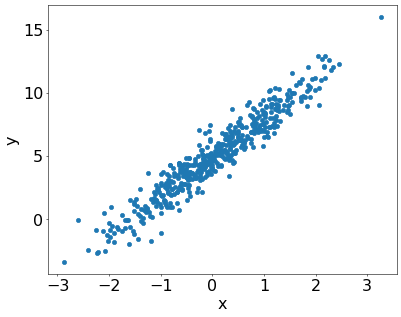

In [2]:
# draw 500 random samples from a normal distribution
x = np.random.normal(size=500) 

# print the shape of x
print(x.shape)

# generate y values by multiplying x by 3 and adding 5
y = 3*x + 5 

# add some random noise to y
y += np.random.normal(size=y.size)

# plot the data points using matplotlib
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

---

## Simpler Linear Regression

Now, we will use this data set to demonstrate linear regression, a fundamental technique used to model the linear relationship between an independent variable (input) and a dependent variable (output).

In our toy example, the simplest model to describe the data would be a linear regression model of the form:

$$
y = f(x) = w x + b
$$

Here, $w$ represents the slope of the linear relationship between $x$ and $y$, while $b$ represents the y-intercept. Our goal is to find the best values of $w$ and $b$ that can accurately describe our data points ${(x_i,y_i)}$. This process of finding the best estimates of the parameters of a model based on input/output data is known as model training.

Before we can train our model in PyTorch, we need to convert our numpy variables to PyTorch tensors. This is because PyTorch operates on tensors, which are similar to numpy arrays but with additional functionality to support deep learning computations.

In [3]:
# convert x to a PyTorch tensor with dtype torch.float32
x_torch = torch.tensor(x, dtype=torch.float32)

# convert y to a PyTorch tensor with dtype torch.float32
y_torch = torch.tensor(y, dtype=torch.float32)

In machine learning terminology, $w$ and $b$ are commonly referred to as the "weights" and "bias" of the model, respectively. To implement the linear regression model in PyTorch, we will define the parameters $w$ and $b$ as instances of the `nn.Parameter` class. This class represents learnable parameters of a PyTorch model and allows PyTorch to track gradients during training.

The `nn.Parameter` class takes a tensor as input and specifies that the tensor is a learnable parameter of the model. In our case, we initialize $w$ and $b$ with random values using PyTorch's `torch.randn()` function and set `requires_grad=True` to indicate that gradients should be computed and accumulated for these parameters during training.

In [4]:
# create a learnable parameter for the weight w with shape (1,) and requires gradient
w = nn.Parameter(torch.randn(1, requires_grad=True))

# create a learnable parameter for the bias b with shape (1,) and requires gradient
b = nn.Parameter(torch.randn(1, requires_grad=True))

Now that we have defined our linear regression model and initialized its learnable parameters, we need to train the model to learn the best values of $w$ and $b$ that minimize the mean squared error between our predicted values and the actual values of $y$.

To do this, we will use an optimization algorithm called gradient descent, which iteratively updates the values of $w$ and $b$ in the direction of steepest descent of the mean squared error loss function. This process involves computing the gradients of the loss function with respect to the model parameters and using these gradients to update the parameter values.

Fortunately, we don't need to implement the gradient descent algorithm from scratch ourselves. PyTorch provides a built-in optimization module called `torch.optim` that contains many commonly used optimization algorithms, including stochastic gradient descent (SGD), Adam, and Adagrad.

To use the `torch.optim` module, we first need to define an optimizer object that specifies the parameters to optimize and the optimization algorithm to use. In our case, we will use SGD as the optimization algorithm and specify that we want to optimize the learnable parameters of our linear regression model, which are the weight w and bias b.

We can define our optimizer as follows:

In [5]:
# set the learning rate for the optimizer
lr = 0.1

# define a list of parameters to optimize, here w and b
params = [w, b]

# create an instance of the SGD optimizer with the specified learning rate and parameters to optimize
optimizer = torch.optim.SGD(params, lr=lr)


We will train our model for a fixed number of iterations or epochs, which corresponds to the number of times that we will loop over the entire training data set during training. Each epoch consists of a forward pass through the model to compute the predicted values, followed by a backward pass to compute the gradients and update the model parameters.

We can define the number of epochs to train the model for using a variable called `num_epochs`. This variable specifies how many times we want to loop over the training data set during training.

In [6]:
# specify the number of epochs to train for
num_epochs = 500

To train our linear regression model, we need to define a loss function that measures how well our model's predictions match the actual values of $y$ in our training data set. The loss function quantifies the difference between our predicted values and the actual values of $y$ and provides a measure of the quality of our model's predictions.

In our case, we will use the mean squared error (MSE) loss function, which is defined as the mean of the squared differences between our predicted values and the actual values of y over the entire training data set. The MSE loss function is given by:

$$
L(w, b) = \dfrac{1}{N}\sum_{i=1}^{N}(f(x_i) - y_i)^2
$$
 
where $N$ is the number of training samples, $f(x_i) = wx_i + b$ is the predicted value for the $i$-th training sample, and $y_i$ is the actual value of $y$ for the $i$-th training sample.

In [7]:
def loss_fn(predict, truth):
    # Compute the mean squared error loss between the predicted and actual values
    # of y using PyTorch's built-in function for element-wise tensor subtraction and
    # exponentiation
    loss = torch.mean((predict - truth)**2)
    return loss


With the linear regression model and the training data set prepared, we can now train the model using PyTorch. The training process involves iteratively updating the model parameters to minimize the mean squared error loss between the predicted values and the actual values of $y$ in the training data set.

The training process consists of the following steps:

- **Make Predictions**: In each epoch, the current model parameters $w$ and $b$ are used to make predictions for the input data $x_{\rm torch}$. These predictions are computed as the linear combination of the input data and the model parameters using the equation $f(x_i) = w x_i + b$.

- **Compute Loss**: The mean squared error loss between the predicted values and the actual values of $y$ in the training data set is then computed using the `loss_fn` function defined earlier. This loss measures how well the current model parameters fit the training data set.

- **Compute Gradients**: The optimizer object, optimizer, is then used to compute the gradients of the loss function with respect to the model parameters $w$ and $b$ using PyTorch's automatic differentiation functionality. These gradients represent the direction of steepest descent of the loss function with respect to the model parameters.

- **Update Model Parameters**: Finally, the optimizer updates the values of the model parameters $w$ and $b$ using the computed gradients and a specified learning rate, which determines the step size of the updates. The updated model parameters are then used in the next epoch to make new predictions and compute a new loss.

By repeating these steps for a fixed number of epochs, we gradually update the model parameters to minimize the loss function and improve the accuracy of the model's predictions on the training data set.

In [8]:
# Train the linear regression model with PyTorch
for epoch in range(num_epochs):
    
    # Make predictions using the current model parameters
    predictions = w * x_torch + b
    
    # Calculate the mean squared error loss between the predicted values
    # and the actual values of y
    loss = loss_fn(predictions, y_torch)
    
    # Compute the gradients of the loss function with respect to the model
    # parameters w and b, and update their values using the optimizer
    optimizer.zero_grad()  # Zero out the gradients from the previous iteration
    loss.backward()  # Compute gradients
    optimizer.step()  # Update model parameters
    
    # Print training loss every 50 epochs
    if epoch % 50 == 0:
        print('Epoch %s:' % epoch, 'Training Loss = %.3f' % loss)

Epoch 0: Training Loss = 34.200
Epoch 50: Training Loss = 0.847
Epoch 100: Training Loss = 0.847
Epoch 150: Training Loss = 0.847
Epoch 200: Training Loss = 0.847
Epoch 250: Training Loss = 0.847
Epoch 300: Training Loss = 0.847
Epoch 350: Training Loss = 0.847
Epoch 400: Training Loss = 0.847
Epoch 450: Training Loss = 0.847


Before computing the gradient of the loss function with respect to the model parameters, $w$ and $b$, we first need to zero out any gradients that may have been accumulated in the optimizer object, `optimizer`. This is because PyTorch, by default, accumulates the gradients computed in each iteration rather than overwriting them. This can be a useful feature in some neural network architectures.

However, in our case, we need to zero out the gradients at each step to avoid inadvertently accumulating gradients from previous iterations. This is done using the `zero_grad()` method of the optimizer object, which resets all gradients to zero.

After zeroing out the gradients, we can compute the gradient of the loss function with respect to the model parameters using PyTorch's automatic differentiation functionality. This gradient represents the direction of steepest descent of the loss function with respect to the model parameters, and it tells us how much to adjust the values of $w$ and $b$ to improve the accuracy of the model's predictions.

Once the gradients have been computed, the optimizer updates the values of $w$ and $b$ using the computed gradients and the learning rate specified earlier. The updated values of $w$ and $b$ are then used to make new predictions and compute a new loss in the next iteration.

---

Now that we have trained our linear regression model using PyTorch, we can examine the final values of the model parameters, $w$ and $b$, to see how well our model fits the data. These values represent the best estimates of the slope and intercept of the linear relationship between $x$ and $y$ that we can obtain using our model.

To extract the final values of $w$ and $b$, we can simply access their data attribute, which contains the underlying tensor values. Examining the final values of $w$ and $b$ is an important step in evaluating the performance of our linear regression model. If the values are close to the true values used to generate the mock dataset, then we can be confident that our model has learned the correct relationship between $x$ and $y$. On the other hand, if the values are significantly different, then our model may be underfitting or overfitting the data.

In general, it's a good idea to evaluate the performance of machine learning models using additional metrics beyond just the parameter values. For example, we can use techniques like cross-validation and holdout testing to estimate the generalization performance of our model on unseen data. These techniques can help us avoid overfitting the model to the training data and ensure that it will perform well on new data.

In [9]:
print(w)
print(b)

Parameter containing:
tensor([3.0352], requires_grad=True)
Parameter containing:
tensor([4.9597], requires_grad=True)


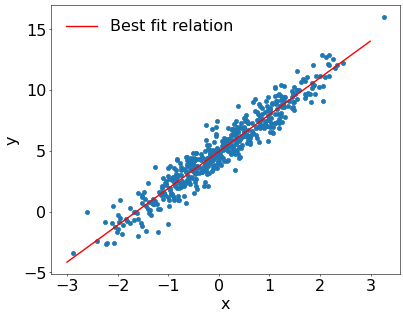

In [10]:
plt.scatter(x_torch, y_torch)  # scatter plot of the input x values and the corresponding y values

x_predict = torch.arange(-3, 3, 0.01)  # create a tensor with x values ranging from -3 to 3 with a step size of 0.01
y_predict = w*x_predict + b  # compute the predicted y values using the trained model and the x values
plt.plot(x_predict, y_predict.detach(), color="r", label="Best fit relation")  # plot the predicted y values against the x values

plt.xlabel("x")  # set the x-axis label
plt.ylabel("y")  # set the y-axis label
plt.legend(frameon=False)  # add a legend to the plot

In PyTorch, the `.detach()` method is used to create a new tensor that shares the same storage as the original tensor but with the computational graph detached. The computational graph is an important component of PyTorch that tracks the flow of computations through tensors and helps with automatic differentiation during backpropagation.

When we use a tensor in a computation that requires gradients, the computational graph tracks the operations that were performed on the tensor, so that we can compute the gradients of the output with respect to the input using the chain rule. However, sometimes we might want to use the tensor in a computation that does not require gradients, such as when we are plotting the results. In such cases, we need to detach the tensor from the computational graph to avoid unnecessary memory usage and computations.

In the given code, the `.detach()` method is used to create a copy of the tensor `y_predict` that is not attached to the computational graph. This allows us to use the tensor as a numpy array and plot the results without any issues.

---

The $L2$ loss, also known as the mean squared error, is just one of the many loss functions that can be used to train a neural network. In fact, depending on the problem and the nature of the data, different loss functions may be more appropriate.

For instance, another common loss function is the mean absolute error, or $L1$ loss, which is given by:

$$
 {\rm argmin}_{w,b} \sum_i | f(x_i) - y_i |. 
$$

The $L1$ loss is less sensitive to outliers than the $L2$ loss, and can be more appropriate in cases where the data contains significant noise or outliers.

Fortunately, PyTorch's automatic differentiation feature is agnostic to the choice of loss function. This means that changing the loss function requires only minimal changes to the code, and the same optimization algorithm can be used to train the model. In fact, PyTorch provides a range of built-in loss functions that can be used for various types of problems, and custom loss functions can also be defined if needed.

In [11]:
# Define the loss function using L1 loss instead of L2 loss
def loss_fn(predict, truth):
    ### we only change this part ###
    return torch.mean(torch.abs(predict-truth))

# Initialize the parameters for our linear regression model
w = nn.Parameter(torch.randn(1, requires_grad=True))
b = nn.Parameter(torch.randn(1, requires_grad=True))

# Define the optimizer with stochastic gradient descent
params = [w, b]
lr = 0.1
optimiser = torch.optim.SGD(params, lr=lr)

#------------------------------------------------------------
# Train the model for a certain number of epochs
num_epochs = 500
for e in range(num_epochs):

    # Make predictions using the current model
    predict = w*x_torch + b
    
    # Calculate the loss using the L1 loss function
    loss = loss_fn(predict, y_torch)
    
    # Zero out the gradients, calculate the gradient, and update the parameters using the optimizer
    optimiser.zero_grad()
    loss.backward() 
    optimiser.step() 
        
    # Print the training loss every 50 epochs
    if e % 50 == 0:
        print('iter %s:' % e, 'training loss = %.3f' % loss)

#------------------------------------------------------------
# Print the best estimated values for w and b
print(w)
print(b)

iter 0: training loss = 6.114
iter 50: training loss = 2.240
iter 100: training loss = 0.725
iter 150: training loss = 0.723
iter 200: training loss = 0.723
iter 250: training loss = 0.723
iter 300: training loss = 0.723
iter 350: training loss = 0.723
iter 400: training loss = 0.723
iter 450: training loss = 0.723
Parameter containing:
tensor([3.0365], requires_grad=True)
Parameter containing:
tensor([4.9104], requires_grad=True)


---

## Multivariate Linear Regression

Let's now expand on the above text to provide more details about multivariate linear regression.

Multivariate linear regression is a common machine learning technique used to model the relationship between multiple independent variables (features) and a dependent variable (target). In contrast to simple linear regression, where there is only one independent variable, multivariate linear regression deals with multiple independent variables.

In this example, we consider a multivariate linear regression problem where $\mathbf{x}$ is a $100$-dimensional vector, and $y$ is a scalar. The relationship between $\mathbf{x}$ and $y$ is defined by a weight vector $\mathbf{W}$ of size $100\times 1$ and a scalar bias term $b$. The equation for this linear model is given by:

$$
y = \mathbf{W} \cdot \mathbf{x} + b
$$

Our goal is to find the optimal values of $\mathbf{W}$ and $b$ that minimize the difference between our predicted values of $y$ and the actual values of $y$.

To solve this optimization problem, we can use the same gradient descent algorithm that we used in the previous example. The only difference is that now we need to update the weights for each dimension of $\mathbf{x}$. We can achieve this by using matrix multiplication instead of scalar multiplication.

In PyTorch, we can represent the weight matrix $\mathbf{W}$ and the bias term $b$ as tensors of size $100\times 1$ and $1\times 1$, respectively. We can then perform matrix multiplication between $\mathbf{W}$ and $\mathbf{x}$ using the `torch.matmul()` (or @) function.

With these changes, we can easily modify our previous PyTorch code to perform multivariate linear regression.


In [12]:
# Generate random data of size (number of samples x number of dimensions)
x = np.random.normal(size=(5000,100)) 

# Define the true values for w and b
w_true = (np.arange(100)*0.1).reshape(100,1)
b_true = 0

# Generate mock data using the true values of w and b
y = np.dot(x,w_true) + b_true
y += np.random.normal(size=y.shape) 

#------------------------------------------------------------
# Convert data to torch tensor format
x_torch = torch.tensor(x, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)

# Initialize parameters and optimizer
w = nn.Parameter(torch.randn((100,1), requires_grad=True))
b = nn.Parameter(torch.randn(1, requires_grad=True))

lr = 0.1
params = [w, b]
optimiser = torch.optim.SGD(params, lr=lr)

#------------------------------------------------------------
# Define the loss function
def loss_fn(predict, truth):
    return torch.mean((predict-truth)**2)

#------------------------------------------------------------
# Train the model using optimization with PyTorch
for e in range(num_epochs):
    predict = x_torch @ w + b # Perform matrix multiplication in PyTorch
    loss = loss_fn(predict, y_torch) 
    
    optimiser.zero_grad() # Zero out the gradient in the optimizer
    loss.backward() # Calculate the gradient
    optimiser.step() # Update the parameters (w and b)
        
    if e % 50 == 0:
        print('iter %s:' % e, 'training loss = %.3f' % loss)


iter 0: training loss = 3554.290
iter 50: training loss = 0.986
iter 100: training loss = 0.986
iter 150: training loss = 0.986
iter 200: training loss = 0.986
iter 250: training loss = 0.986
iter 300: training loss = 0.986
iter 350: training loss = 0.986
iter 400: training loss = 0.986
iter 450: training loss = 0.986


We will first check if we have correctly estimated the 100 linear weights $W_1, W_2, \ldots, W_{100}$,

Text(0, 0.5, 'Weight Recovered')

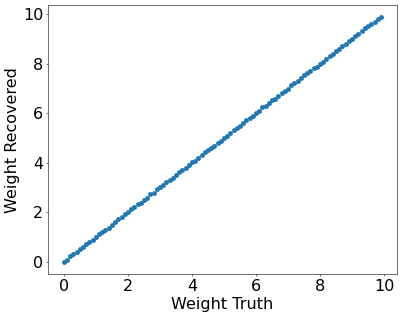

In [13]:
plt.scatter(w_true, w.view(-1).detach())
plt.xlabel("Weight Truth")
plt.ylabel("Weight Recovered")

Great job!

Now that we have obtained the optimized parameters for our linear regression model, we can use them to make predictions on new data. In this case, we want to use the optimized model to forecast the $y$ values for new $x$ values.

To do this, we can use the learned weights $\mathbf{w}$ and bias $b$ to predict the $y$ values for the input data. We can then compare these predicted values to the actual values to evaluate how well the model works.

Text(0, 0.5, 'y predict')

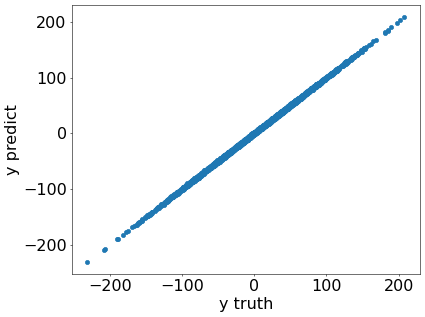

In [14]:
# make predictions using the trained model
predict = x_torch@w + b

# plot the predicted values against the true values
plt.scatter(y_torch, predict.detach())

# set the labels for x and y axis
plt.xlabel("y truth")
plt.ylabel("y predict")


In linear regression, the dependent variable is assumed to have a linear relationship with one or more independent variables. However, in astronomy, most of the time, a non-linear regression is required to accurately capture the physical phenomenon. We will illustrate this by exploring a subset of the Gaia data.

---

## Inferring Radial Velocity from 5D Phase Space Information

We will explore a subset of the Gaia data with radial velocity measurements and with about 55K entries.

In [15]:
df = pd.read_csv("https://www.mso.anu.edu.au/~yting/Teaching/data_gaia.csv")  # read the csv file from the url
print(df.head(5))  # print the first five rows of the dataframe

print("")
print("Number of entries:", len(df.index))  # print the number of rows in the dataframe''', language='python')


         l       b   pmra  pmdec  parallax       rv
0  347.039  -7.995 -5.891 -4.266     0.093 -200.000
1    5.661  27.490 -9.752 -7.363     0.818 -199.393
2   43.844   6.197 -4.877 -4.540     0.172 -198.883
3  349.216   5.675 -3.702 -1.692     0.123 -198.264
4    2.138   8.737 -6.479 -6.404     0.159 -197.636

Number of entries: 55005


Let us create a visualization of the data in the `Pandas` frame using `Seaborn`. Seaborn is a Python data visualization library based on `Matplotlib` and provides a high-level interface for creating informative and attractive statistical graphics.

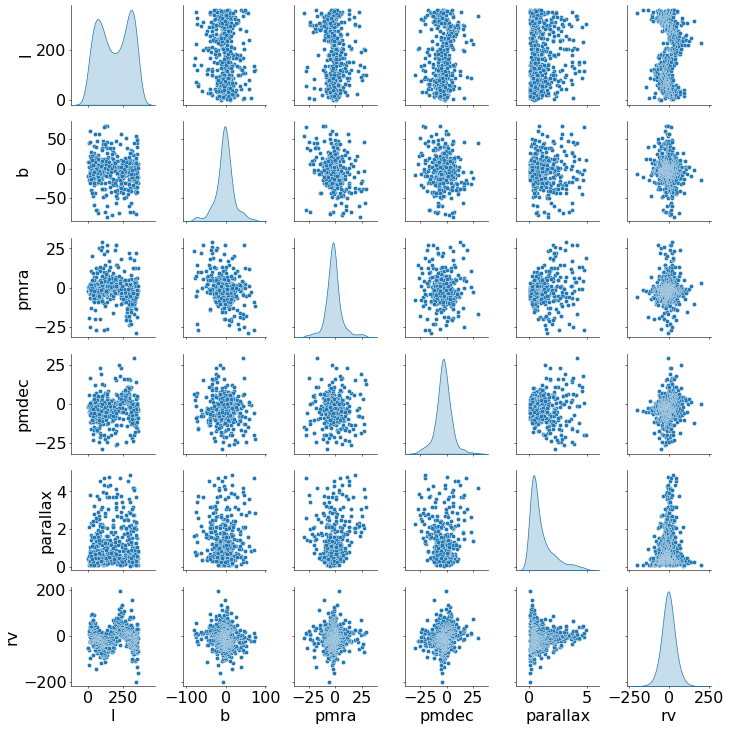

In [16]:
# We subsample the dataframe by a factor of 100 to improve visualization of the off-diagonal scatter plots
# The pairplot() function from the Seaborn library is used to plot pairwise relationships in the dataset
# The argument diag_kind="kde" specifies that the diagonal plots should display the kernel density estimate of the distribution of each variable, while the argument kind="scatter" specifies that the off-diagonal plots should display a scatter plot of the two variables.
sns.pairplot(df[::100], diag_kind="kde", kind="scatter")


Stars in the Milky Way move in a somewhat coherent manner, which implies that their phase-space information is inherently correlated. Therefore, we can expect to infer a missing value in the 6D phase-space information from the other 5D information to some extent. In this example, we aim to find a function $f$ that can predict the radial velocity ("RV") of a star from its other 5D phase-space information, namely, longitude, latitude, parallax, proper motion in right ascension, and proper motion in declination.

However, since we are dealing with heliocentric coordinates, such a relation is likely to be highly nonlinear. Therefore, we will demonstrate how a simple multivariate linear regression model fails to capture the underlying relation and then move on to neural networks for a better model.

---

### Good Practices in Machine Learning

In addition to demonstrating why a simple multivariate linear model will not work well for inferring radial velocity from other 5D phase space information, we will also take this opportunity to introduce some best practices in machine learning that will be useful when we explore neural networks later.

(1) One essential practice is to randomize our data, especially when the data is ordered. In the case of the Gaia data, it is sorted by the RV values. By randomizing the data, we can avoid introducing any unintentional bias in our analysis. In `Pandas`, there is a convenient way to do this using the `sample()` function with the `frac` argument.

In [17]:
# we resample with fraction=100% sample (without repetition). 
# essentially, this will randomize all entries in the pandas frame
df = df.sample(frac=1, replace=False)
print(df.head(5))

             l      b   pmra  pmdec  parallax      rv
18957  336.627 -1.230 -1.905 -1.222     1.348 -19.224
43926   54.652 -2.878 -5.462 -9.626     0.247  29.529
40314  338.063  0.854 -4.987 -2.062     0.460  20.391
27524  147.666  0.429  5.058 -6.349     0.836  -3.903
25646  183.566 -0.879  0.584 -8.224     0.961  -7.157


(2) The next step is to extract the input features and output labels from the Pandas data frame using good data preprocessing practices. Specifically, we will select certain columns in the data frame as input features (referred to as "$x$") and the remaining columns as output labels (referred to as "$y$"). In our case, we will set the radial velocity (RV) as the output label, and the other five-dimensional phase-space information (longitude, latitude, parallax, proper motion in RA, and proper motion in Dec) as the input features.

In [18]:
# select the RV column from the Pandas frame as the label
y = df.loc[:, df.columns.isin(['rv'])]

# extract the name of the RV column
y_element = np.array(y.columns)

# print the name of the label and its shape
print("label = ", y_element)
print(y.shape)

print(" ")

# eliminate the RV column, and keep the other 5D as the input features
x = df.loc[:, ~df.columns.isin(['rv'])]

# extract the names of the input features
x_element = np.array(x.columns)

# print the names of the features and their shape
print("features = ", x_element)
print(x.shape)


label =  ['rv']
(55005, 1)
 
features =  ['l' 'b' 'pmra' 'pmdec' 'parallax']
(55005, 5)


(3) Training large machine learning models with millions to billions of parameters on a CPU can be impractical due to the computational complexity. To overcome this issue, we will use a GPU to train our models whenever possible. If you don't have access to a GPU, you can still train the following model on a laptop as it is small enough. Another alternative is to use Google Colab, which provides GPUs for free or with an additional cost for more updated GPUs. In the following code, we will check if your machine has a GPU to determine if we can use it to train the model.

In [19]:
# Check if CUDA is available
print(torch.cuda.is_available()) # true = yes, there is a GPU, false = oh no...

# Select the device for tensor calculations (GPU if available, else CPU)
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"


False


The first line checks if `CUDA`, which is the parallel computing platform developed by NVIDIA for general computing on their GPUs, is available on the machine. The comment above this line clarifies that the output of the function will be True if there is a GPU available, and False if there is not.

The second block of code checks the output of the previous if statement. If `CUDA` is available, it selects the device for tensor calculations to be the GPU. Otherwise, the device will be set to the CPU for tensor calculations. The comment above this block explains this functionality.

(4) Splitting data into training and validation sets is a common practice in machine learning to evaluate the performance of a model. The typical ratio for splitting the data is 80/20. In this dataset, which has 55K entries, we will use the first 40K entries for training and the remaining 15K entries for validation. This will help us to test our model on unseen data and detect overfitting.

In [20]:
# number of training data
n_train = 40000

# convert Pandas dataframes into torch tensors, and move them to the device (either CPU or GPU)
train_features = torch.tensor(x[:n_train].values, dtype=torch.float32).to(device)
test_features = torch.tensor(x[n_train:].values, dtype=torch.float32).to(device)
train_labels = torch.tensor(y[:n_train].values, dtype=torch.float32).to(device)
test_labels = torch.tensor(y[n_train:].values, dtype=torch.float32).to(device)

# if the data is loaded correctly into the GPU, the output should show 'device='cuda:[x]"'
print(train_features)


tensor([[ 3.3663e+02, -1.2300e+00, -1.9050e+00, -1.2220e+00,  1.3480e+00],
        [ 5.4652e+01, -2.8780e+00, -5.4620e+00, -9.6260e+00,  2.4700e-01],
        [ 3.3806e+02,  8.5400e-01, -4.9870e+00, -2.0620e+00,  4.6000e-01],
        ...,
        [ 1.6219e+02, -1.4080e+01, -9.1200e+00, -1.9020e+00,  2.0590e+00],
        [ 1.0150e+02,  1.7492e+01, -5.7490e+00, -8.4660e+00,  5.6600e-01],
        [ 3.3017e+02,  4.1890e+00, -9.0000e-02, -4.3100e-01,  4.1800e-01]])


(5) It is a common practice in machine learning to standardize the data before training the model. This is because features and labels often have different units and dynamical ranges, which may cause issues for the model during training. Standardization is achieved by shifting individual features/labels by their means and dividing them by their standard deviations. This ensures that all features/labels have the same scale and are centered around zero.

Let's perform standardization on our dataset.

In [21]:
# Standardize the features in the training and test sets
# using the same mean and standard deviation obtained from the training set
feature_std = torch.std(train_features, axis=0)
feature_mean = torch.mean(train_features, axis=0)
train_features = (train_features - feature_mean) / feature_std
test_features = (test_features - feature_mean) / feature_std

# Standardize the labels in the training and test sets
# using the same mean and standard deviation obtained from the training set
label_std = torch.std(train_labels, axis=0)
label_mean = torch.mean(train_labels, axis=0)
train_labels = (train_labels - label_mean) / label_std
test_labels = (test_labels - label_mean) / label_std


For this section, we will use a multivariate linear regression model similar to what we used before to map the 5D phase space information to the RV value. 

$$
f : (l,b, \varpi, pmra, pmdec) \mapsto rv,
$$
    
However, we will see that this model does not work well in this case. The function $f$ maps the 5D phase space information (longitude, latitude, parallax, proper motion in RA and proper motion in Dec) to the RV value. We will train the model using the training set and evaluate its performance on the validation set.

In [22]:
# Get the number of input and output features / labels
num_inputs = train_features.shape[1]
num_outputs = train_labels.shape[1]

# Initialize the model parameters
W1 = nn.Parameter(torch.randn(num_inputs, num_outputs, requires_grad=True).to(device)*0.01)
b1 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True).to(device))

# Define the model using the initialized parameters
def model(X):
    predict = X@W1+b1
    return predict

# Group the model parameters for the optimizer
params = [W1, b1]


In order to simplify the code, we can make use of PyTorch's built-in loss functions rather than writing our own. Here, we will assume that the loss function is the $L2$ mean-squared error (MSE) loss. The "reduction" parameter specifies how the losses from the individual training samples are aggregated, and we will take the mean over all the samples, as we did previously.

In [23]:
loss_fn = torch.nn.MSELoss(reduction = 'mean')

There are two key differences in optimization compared to previously:

(a) Instead of calculating the loss from the entire training set, we will train in batches. Stochastic gradient descent is typically more effective than global gradient descent for larger datasets like the Gaia dataset. The batch size chosen affects the ability to refine the solution and avoid local minima. Recommended batch sizes are 256, 512, or 1024. In this case, we will use a batch size of 512.

(b) We will only train on the training set and evaluate the model on both the training and testing sets to avoid overfitting.

In [24]:
num_epochs = 500    # number of epochs to train the model
batch_size = 512    # size of each batch used for stochastic gradient descent

#------------------------------------------------
# define the optimizer with a learning rate of 0.1
lr = 0.1
optimizer = torch.optim.SGD(params, lr=lr)

# calculate the number of batches per epoch
num_samples = train_features.shape[0]
num_batches = num_samples // batch_size 

#------------------------------------------------
# train the model for the specified number of epochs
for epoch in range(int(num_epochs)):
    
    # shuffle the indices for each epoch
    shuffled_indices = torch.randperm(num_samples) 

    # loop over each batch and perform stochastic gradient descent
    for i in range(num_batches):
        
        # get the indices for the current batch
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch_indices = shuffled_indices[start_idx:end_idx]
        
        # calculate predictions for the current batch
        batch_predictions = model(train_features[batch_indices])

        # calculate the loss for the current batch and perform backpropagation
        loss = loss_fn(batch_predictions, train_labels[batch_indices])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
          
    # print the model performance after each epoch
    train_predictions = model(train_features)
    train_loss = loss_fn(train_predictions, train_labels)

    val_predictions = model(test_features)
    val_loss = loss_fn(val_predictions, test_labels)
        
    if epoch % 50 == 0:
        print('Epoch %s:' % epoch, 'training loss = %.3f' % train_loss,\
              'validation loss = %.3f' % val_loss)


Epoch 0: training loss = 0.973 validation loss = 0.996
Epoch 50: training loss = 0.973 validation loss = 0.997
Epoch 100: training loss = 0.972 validation loss = 0.995
Epoch 150: training loss = 0.973 validation loss = 0.995
Epoch 200: training loss = 0.974 validation loss = 0.997
Epoch 250: training loss = 0.973 validation loss = 0.996
Epoch 300: training loss = 0.973 validation loss = 0.996
Epoch 350: training loss = 0.973 validation loss = 0.997
Epoch 400: training loss = 0.973 validation loss = 0.996
Epoch 450: training loss = 0.973 validation loss = 0.996


The code trains a multivariate linear regression model using stochastic gradient descent. The model is trained for a specified number of epochs with a fixed batch size. The optimizer used is stochastic gradient descent with a learning rate of 0.1.

During each epoch, the indices of the training set are shuffled, and the model is trained on each batch of the shuffled data. The model's predictions for the current batch are calculated, and the loss is calculated using the mean-squared error loss function. The optimizer's gradients are then set to zero, and backpropagation is performed on the loss. Finally, the optimizer is used to update the model's parameters.

After each epoch, the model's performance is evaluated using the mean-squared error loss function on the training and test sets.


'Let's evaluate the performance of our trained model. However, as expected, the simple multivariate linear regression model we used previously is not sufficient to capture the non-linear nature of the problem, and the performance of the model is not satisfactory.

Text(0, 0.5, 'Predicted RV (km/s)')

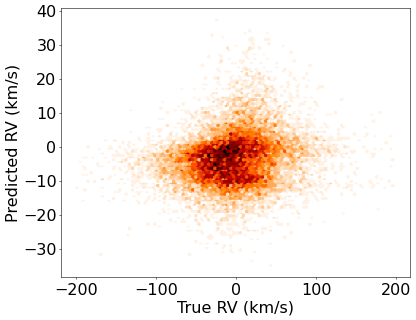

In [25]:
# Make predictions using the trained model on the test set
test_predict = model(test_features).detach()

# Recall that we normalized the label during training to make it easier for the model to learn
# Here, we scale the predictions back to their original units (km/s) using the mean and standard deviation of the training labels
test_predict = test_predict * label_std + label_mean
test_labels_original = test_labels * label_std + label_mean

# If we're using a GPU, we need to move the data back to the CPU for plotting
if torch.cuda.is_available():
  test_labels_original = test_labels_original.cpu()
  test_predict = test_predict.cpu()

# Plot the predicted RV vs the true RV from the Gaia catalog using a hexbin plot
plt.hexbin(test_labels_original[:,0], test_predict[:,0], cmap="gist_heat_r")
plt.xlabel("True RV (km/s)")
plt.ylabel("Predicted RV (km/s)")


In order to improve our prediction model, we will use neural networks. 

---

## Building an MLP from Sketch

Neural networks are powerful models used in machine learning that can approximate complex functions by stacking and composing simple non-linear functions. The Multilayer Perceptron (MLP) network is a basic type of neural network that consists of one or more hidden layers of neurons that transform the input data to output predictions. Each neuron applies a linear transformation on the input data and passes the result through a non-linear activation function.

The key idea behind MLP is that any complex function can be approximated by stacking and composing simple non-linear functions. MLPs are known for their ability to model a wide range of complex functions and have been successfully applied to various fields such as image recognition, natural language processing, and speech recognition.

To build a Multilayer Perceptron (MLP) network, we need to introduce base non-linear functions, also known as activation functions, in machine learning. It is essential to use a non-linear activation function because we cannot introduce non-linearity through a composite of linear functions alone. For example, if $y$ linearly depends on $x$, and $z$ linearly depends on $y$, then $z$ is still linearly dependent on $x$.

One popular choice of activation function in the early days of deep learning is the sigmoid function, which is defined as:

$$
{\rm sigmoid(x)} = \dfrac{1}{1+\exp(x)}.
$$

The sigmoid function has a characteristic S-shape and maps any real-valued number to a value between 0 and 1, which can be interpreted as a probability. The sigmoid function is differentiable, which makes it easy to calculate the gradients needed for backpropagation during training.

Text(0, 0.5, 'sigmoid(x)')

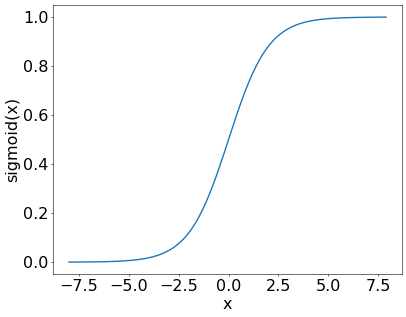

In [26]:
# generate a sequence of values from -8.0 to 8.0 with an interval of 0.1
x = torch.arange(-8.0, 8.0, 0.1)

# apply the sigmoid function to the sequence of values x
y = torch.sigmoid(x)

# plot the sigmoid function
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")


Although the sigmoid function may appear simple at first glance, when combined together, they can approximate complex functions very well. This is done by summing multiple sigmoid functions with different weights and biases:

$$
f: x \mapsto w^i \cdot {\rm sigmoid}(w_i x + b_i) + b,
$$

(where we assume an Einstein summation in the notation above).

For instance, the yellow dotted line in the plot below is the target function that we want to approximate. The colored dashed lines represent individual sigmoid functions that, when summed together, result in the solid white line. It is evident that even individual sigmoid functions can be simple, yet they can be extremely powerful when we use many of them collectively.

Let's break down the formula:

We have an input vector $\mathbf{x} \in \mathbb{R}^n$, where $n$ is the number of features. The weight $\mathbf{w}_i$ is a matrix with $\mathbb{R}^{h \times n}$ dimensions, where $h$ is the "hidden" dimension that we will define. Using a larger $h$ means using more sigmoid functions to approximate the function. The matrix multiplication $\mathbf{w}_i \cdot \mathbf{x}$ results in a $\mathbb{R}^h$ vector. For consistency, the bias $\mathbf{b}_i$ is also a $\mathbb{R}^h$ vector.

Next, we have the second weight matrix $\mathbf{w}^i$ with $\mathbb{R}^{m \times h}$ dimensions, where $m$ is the number of output variables. The second bias $\mathbf{b}$ is a $\mathbb{R}^m$ vector. The matrix multiplication then leads to $\mathbf{w}^i \cdot {\rm sigmoid}(\mathbf{w}_i x + \mathbf{b}_i) + \mathbf{b} \in \mathbb{R}^m$, which is the desired output dimension.

The code below shows how we can represent these mathematical operations in just a few lines of code.

In [27]:
num_inputs = train_features.shape[1]
num_outputs = train_labels.shape[1]
num_hiddens = 128  # number of hidden nodes for each hidden layer

# initialize weights and biases for the first layer
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True))
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))

# initialize weights and biases for the second layer
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True))
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

#------------------------------------------------
# define the MLP model
def model(x):
    
    # compute the output of the first layer
    H = torch.sigmoid(x@W1+b1)
    
    # compute the final output using the output of the first layer
    predict = H@W2 + b2
    
    # return the final output
    return predict

# store the parameters of the model
params = [W1, b1, W2, b2]

In machine learning, it is often easier to visualize complex mathematical operations using graphical models. The model described above can be represented graphically as follows (although, in our case, the input layer should have five nodes and the output layer only one node):

Each node in the input layer corresponds to a feature, and the output node represents the predicted value. The hidden layer, shown in the middle, consists of multiple nodes that are connected to each input node and the output node. The number of nodes in the hidden layer is determined by the `num_hiddens` parameter specified in the code.

In the graphical representation, the arrows between nodes represent the weights or parameters. The weights in the input layer are the $W1$ matrix and the bias term $b1$, while the weights in the hidden layer are the $W2$ matrix and the bias term $b2$.

By passing the input through the weights and bias terms, each node in the hidden layer calculates a weighted sum of the input features and applies the sigmoid activation function to produce an output. These outputs are then used to calculate the final prediction in the output layer.



---

### Activation Functions: Sigmoid vs ReLU

Although the Sigmoid function was heavily used in the early days of machine learning, it has some fundamental flaws. One of its major drawbacks is its gradient.

The gradient of Sigmoid can be calculated analytically as follows:

$$
\frac{{\rm d}}{{\rm d}x} {\rm sigmoid} (x)= \dfrac{\exp(-x)}{(1+\exp (-x))^2} = {\rm sigmoid}(x)(1-{\rm sigmoid}(x)).
$$

Alternatively, we can also evaluate it numerically using autodiff.

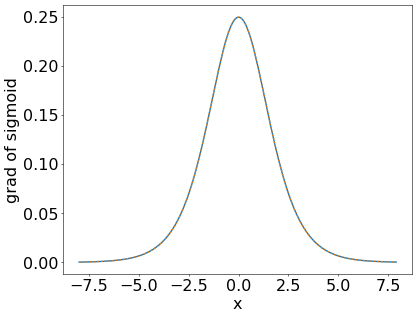

In [28]:
# create a tensor with values from -8.0 to 8.0 with a step of 0.1, and mark it as a leaf tensor
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)

# apply the sigmoid function to the tensor x to get the output tensor y
y = torch.sigmoid(x)

# compute the gradients of y with respect to x using backpropagation
# note that we pass torch.ones_like(x) as an argument here because y is a vector output, 
# and we want to calculate the gradient with respect to individual elements of x
y.backward(torch.ones_like(x))

# plot the gradient of x with respect to the output y
plt.plot(x.detach(), x.grad)

# set x-axis and y-axis labels
plt.xlabel("x")
plt.ylabel("grad of sigmoid")

# compute the analytical gradient of the sigmoid function with respect to x
analytic_x_grad = torch.sigmoid(x) * (1 - torch.sigmoid(x))

# plot the analytical gradient of the sigmoid function with respect to x
plt.plot(x.detach(), analytic_x_grad.detach(), ls=":")

As shown, one of the problems with Sigmoid activation function is that the gradient approaches zero gradually. This slow convergence can make the gradient descent process time-consuming. Due to this, Sigmoid is not commonly used in modern neural networks. Instead, other activation functions, such as ReLU (short for rectified linear unit), have become more popular.

ReLU is a simple and effective activation function that has been shown to work well in a wide range of applications. Mathematically, ReLU is defined as follows:

$$
f(x) =
\begin{cases}
0,\,{\rm if} \; x < 0\\
x,\,{\rm if} \; x > 0
\end{cases}
$$

Text(0, 0.5, 'relu(x)')

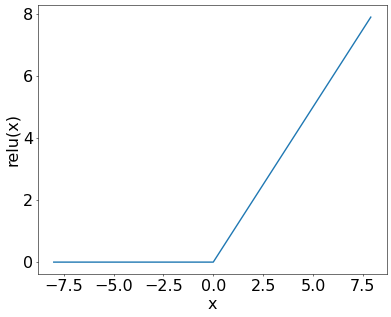

In [29]:
# create a tensor from -8.0 to 8.0 with a step of 0.1
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)

# apply ReLU activation function element-wise to the tensor `x`
y = torch.relu(x)

# plot the tensor `y` against `x`
plt.plot(x.detach(), y.detach())
plt.xlabel("x")
plt.ylabel("relu(x)")


ReLU activation function is computationally cheap since it involves only simple thresholding operations. Additionally, ReLU is more robust to the vanishing gradient problem that arises in deep neural networks, where the gradients become too small during backpropagation, causing the weights to update slowly. ReLU ensures that the gradients are non-zero for all positive values of $x$, which helps to mitigate this problem.

Text(0, 0.5, 'grad of ReLU')

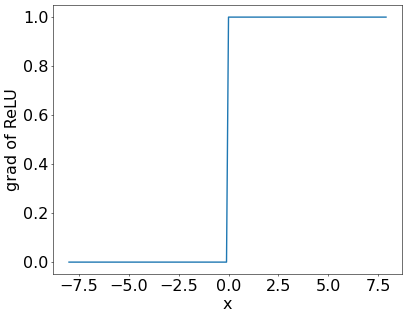

In [30]:
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(),x.grad)
plt.xlabel("x")
plt.ylabel("grad of ReLU")

As mentioned earlier, using ReLU as the activation function instead of Sigmoid has become more popular in recent years. ReLU is known to converge faster during training and avoid the "vanishing gradient" problem associated with Sigmoid.

Therefore, we will use ReLU as the activation function for our simple neural network. However, you can still switch to Sigmoid if you want to compare the results and see the difference in training time.

With ReLU as the activation function, let's define our simple neural network.

In [31]:
num_inputs = train_features.shape[1]
num_outputs = train_labels.shape[1]
num_hiddens = 128 # number of hidden nodes for each hidden layer

# initialize the weights W1 and W2 with a Gaussian distribution
# with small variance, i.e., N(0,0.01)
# initialize the biases b1 and b2 with zeros
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True, device=device)*0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True, device=device))

W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True, device=device)*0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True, device=device))

# define the model using ReLU as the activation function for the hidden layer
# and a linear function for the output layer
def model(x):
    H = torch.relu(x @ W1 + b1)
    predict = H @ W2 + b2
    return predict

# collect all the learnable parameters in the params list
params = [W1, b1, W2, b2]

Now, we will focus on defining the optimizer for our neural network. While there are various optimization algorithms, such as Adam, we will be using the SGD optimizer. Although other optimizers may perform better on some datasets, we have found that SGD performs better than Adam for this specific case. Therefore, we will use SGD to optimize our neural network.

In [32]:
lr = 0.1
optimiser = torch.optim.SGD(params, lr=lr)

It's important to note that even for a simple model like the MLP, tweaking a few hyperparameters such as the learning rate and optimizer can make a significant difference in the results. However, there are algorithms like `AutoML` that can help automate the search for optimal hyperparameters. 

While tuning hyperparameters is useful, it's important to prioritize choosing the right class of neural networks for a particular task. In addition to MLPs, there are other types of neural networks like convolutional neural networks, recursive neural networks, transformers, and graph neural networks. Each of these is tailored to address different types of data. Therefore, as you continue to learn about machine learning, it's essential to understand these other classes of neural networks and their respective ``inductive biases."

In machine learning, an inductive bias is a set of assumptions or prior knowledge built into the learning algorithm or model. It is used to guide the learning process and can have a significant impact on the model's performance and generalization ability.

Inductive biases can be explicit or implicit. Explicit biases are the assumptions and constraints that are explicitly encoded into the model or algorithm, such as the choice of architecture or regularization methods. On the other hand, implicit biases are the assumptions that are inherent in the learning process, such as the bias towards simpler models or the assumption that the data is generated from a stationary distribution.

The choice of inductive bias can have a significant impact on the model's performance and generalization ability. A well-chosen inductive bias can lead to faster convergence, better generalization, and improved performance on specific tasks. However, an inappropriate inductive bias can lead to poor performance, overfitting, or underfitting.

With that in mind, we shall now use our simple MLP model to infer the Gaia RV. The training process remains the same since the optimizer is completely independent of the model.

In [33]:
# create lists to store the training loss and testing loss at each epoch
train_ls, test_ls = [], []

num_epochs = 500  # number of times to loop through the dataset
batch_size = 512  # number of samples in each mini-batch

nsamples = train_features.shape[0]  # number of samples in the training set
nbatches = nsamples // batch_size  # number of mini-batches in the training set

#------------------------------------------------
# loop through the epochs
for e in range(int(num_epochs)):
    
    # create a random permutation of the training set indices
    perm = torch.randperm(nsamples)
    
    counter = 0  # counter to keep track of number of mini-batches
    loss_average = 0  # variable to store average loss over mini-batches
    
    # loop through the mini-batches
    for i in range(nbatches):
        idx = perm[i*batch_size:(i+1)*batch_size]  # get indices of current mini-batch
        train_predict = model(train_features[idx])  # make predictions for current mini-batch
        loss = loss_fn(train_predict, train_labels[idx])  # calculate loss for current mini-batch
        
        optimiser.zero_grad()  # reset gradients to zero
        loss.backward()  # backpropagate the loss through the model
        optimiser.step()  # update model parameters
        
        # accumulate the losses from individual mini-batches
        counter += 1
        loss_average += loss
        
#------------------------------------------------
    if torch.cuda.is_available():
        loss_average = loss_average.cpu()
    
    loss_average = loss_average.detach().numpy() / counter  # calculate average loss over mini-batches
    train_ls.append(loss_average)  # append average training loss for current epoch to list
    
    test_predict = model(test_features)  # make predictions for test set
    loss_test = loss_fn(test_predict, test_labels)  # calculate loss for test set
    
    if torch.cuda.is_available():
        loss_test = loss_test.cpu()
    
    test_ls.append(loss_test.detach().numpy())  # append test loss for current epoch to list
    
    # print training and validation losses every 50 epochs
    if e % 50 == 0:
        print('iter %s:' % e, 'training loss = %.3f' % loss_average,\
              'validation loss = %.3f' % loss_test)


iter 0: training loss = 0.988 validation loss = 0.984
iter 50: training loss = 0.667 validation loss = 0.670
iter 100: training loss = 0.651 validation loss = 0.651
iter 150: training loss = 0.641 validation loss = 0.647
iter 200: training loss = 0.652 validation loss = 0.650
iter 250: training loss = 0.626 validation loss = 0.675
iter 300: training loss = 0.641 validation loss = 0.643
iter 350: training loss = 0.637 validation loss = 0.643
iter 400: training loss = 0.628 validation loss = 0.651
iter 450: training loss = 0.623 validation loss = 0.634


Standard Deviation: 35.59  km/s


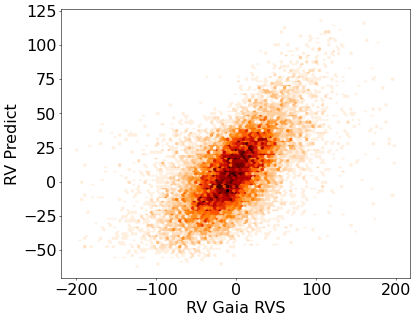

In [34]:
# get model predictions for test features and detach from computational graph
test_predict = model(test_features).detach()

# convert the standardized predictions back to their original units
test_predict = test_predict * label_std + label_mean
test_labels_original = test_labels * label_std + label_mean

# if GPU is available, move tensors to CPU
if torch.cuda.is_available():
  print("ran on GPU")
  test_labels_original = test_labels_original.cpu()
  test_predict = test_predict.cpu()
  
# plot the RV Gaia RVS against RV Predict using a hexbin plot
plt.hexbin(test_labels_original[:,0],test_predict[:,0], cmap="gist_heat_r")
plt.xlabel("RV Gaia RVS")
plt.ylabel("RV Predict")

# calculate and print the standard deviation of the prediction errors with two decimal places
print("Standard Deviation:",f"{torch.std(test_labels_original[:,0]-test_predict[:,0]).item():.2f}", " km/s")


The results obtained are impressive since the radial velocity of a star can be inferred to about 35 km/s using only the star's location and proper motion, without measuring its spectrum. This demonstrates the power of machine learning algorithms in making accurate predictions based on limited input data.

However, to ensure that our model is not overfitting, we need to examine the training and testing losses at different epochs. This can help us evaluate the model's generalization performance and determine if it is overfitting to the training data.

This evaluation can help us identify if the model is overfitting to the training data or not. If the training loss keeps decreasing but the testing loss remains high, it means the model is overfitting, and we need to stop the training and fine-tune the model's hyperparameters or adjust the model's architecture.

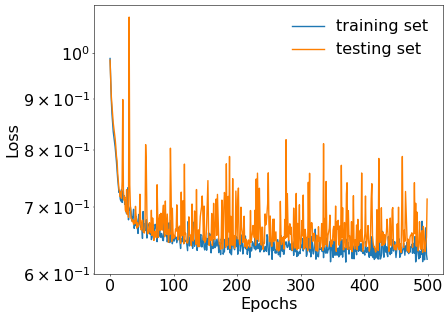

In [35]:
# create a new figure
fig = plt.figure()

# get the current axis
ax = fig.gca()

# plot the training and testing losses
plt.plot(train_ls, label="training set")
plt.plot(test_ls, label="testing set")

# set the labels for the x and y axis
plt.xlabel("Epochs")
plt.ylabel("Loss")

# add a legend to the plot
plt.legend(frameon=False)

# set the y-scale to logarithmic
ax.set_yscale("log")


The testing loss being somewhat worse than the training loss is a common phenomenon in machine learning because the model is trained on the training set. The important diagnostic to note is that both the training and testing losses decrease gradually. This indicates that the model is learning and generalizing well. If the model were to overfit, the training loss would keep declining, while the testing loss would start increasing. This is an indicator that the model is memorizing the training data and unable to generalize its performance to unseen testing data.

Congratulations! You have now learned how to build and train an MLP neural network from scratch. This is a significant milestone in your journey to mastering machine learning!

### An Important Note/Caveat

It is essential to understand the difference between a measurement and an inference, as it is a common misconception in astronomy. In our previous example, we demonstrated that it is possible to infer missing RV values from the other 5D information. However, this does not mean that we should not measure RV from spectra. It is important to realize that inferring RV will erase many exciting discoveries. For instance, inferring RV will not find Galactic streams because, by definition, those stars move in a correlated way that defies the average Galactic model.

Additionally, it is important to recognize that neural networks extract correlations between data but not causality. Although we can perform various mappings with MLP and relate specific inputs to outputs, one must be very careful about interpreting the correlation. For example, it is possible for two variables to be correlated but not causally linked. Therefore, when using neural networks, it is crucial to interpret the results carefully.

These subtleties are beyond the scope of this lecture. However, for interested readers, there are resources available to gain a more in-depth understanding of these issues. One such resource is the [Ting & Weinberg 2022](https://arxiv.org/abs/2102.04992)  paper, which provides a detailed discussion of such caveats.


### A Concise Implementation MLP in Pytorch

Up until now, we have been constructing MLP models from scratch, which can be time-consuming and challenging, especially for more complex models with multiple layers and intricate architectures, which are typical in deep learning. To address this challenge, PyTorch provides a modular and concise way of defining models, allowing us to write a few tens of lines of code that perform all the tasks covered in this notebook.

This is where PyTorch comes in handy. In this section, we will explore how to write a concise model that incorporates all the concepts covered in this notebook, making it easy for us to build more complex models in the future.

---


## Applying MLP to APOGEE Elemental Abundances

For this part, we will use a different dataset and study the chemical composition of stars. Specifically, we will analyze the abundances of 15 elements in approximately 24,000 high-quality stellar spectra obtained from the APOGEE survey.

In [36]:
# read the csv file into a pandas dataframe
df = pd.read_csv("https://www.mso.anu.edu.au/~yting/Teaching/data_apogee.csv")

# randomly shuffle the entries in the dataframe
df = df.sample(frac=1, replace=False)

# print the first 5 entries in the dataframe
df.head(5)

# print the number of entries in the dataframe
print("Number of entries:", len(df.index))


Number of entries: 23986


we will focus on inferring the abundances of 11 other elements from the Fe and Mg abundances of stars, using a neural network. More specifically, we want to build a model that takes in the Fe and Mg abundances of a star and predicts its abundance in each of the 11 other elements. Mathematically, we want to map 

$$
f : ({\rm [Fe/H]}, {\rm [Mg/H]}) \mapsto {\rm [X/H]}.
$$

To begin with, we extract the Fe and Mg abundances as features and the abundances of the other 11 elements as labels from the dataset. We will use the first 20,000 entries of the dataset as the training data and the remaining 4,000 entries for testing.

It is worth noting that since all the abundance values have the same dynamical range, there is no need to standardize the data in this case. This simplifies our preprocessing step.

In [37]:
# extract the target labels and store the column names
y = df.loc[:, ~df.columns.isin(['feh', 'mgh'])]
y_element = np.array(y.columns)

# print the target element names and the shape of the target labels
print("Target elements:", y_element)
print(y.shape)
print(" ")

# extract the input features and store the column names
x = df.loc[:, df.columns.isin(['feh', 'mgh'])]
x_element = np.array(x.columns)

# print the input element names
print("Input elements:", x_element)


Target elements: ['oh' 'sih' 'sh' 'cah' 'nah' 'alh' 'kh' 'crh' 'nih' 'vh' 'coh']
(23986, 11)
 
Input elements: ['mgh' 'feh']


The `DataLoader` class in PyTorch simplifies the process of batch training. It can automatically create batches of data, shuffle the data at each epoch, and load the data in parallel using multiple workers.

In [38]:
# check if a GPU is available, if not use CPU
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

# define the number of training samples and batch size
n_train = 20000
batch_size = 512

# convert train_features and train_labels to tensors and load onto the device
train_features = torch.tensor(x[:n_train].values, dtype=torch.float32).to(device)
train_labels = torch.tensor(y[:n_train].values, dtype=torch.float32).to(device)

# create a dataset from train_features and train_labels and load it to a dataloader
train_dataset = list(zip(train_features, train_labels))
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)

# convert test_features and test_labels to tensors and load onto the device
test_features = torch.tensor(x[n_train:].values, dtype=torch.float32).to(device)
test_labels = torch.tensor(y[n_train:].values, dtype=torch.float32).to(device)


The code below demonstrates how to write a neural network model using the PyTorch ``nn.Module`` and ``nn.Sequential`` classes, which allows for a more concise and modular implementation of the model.

In [39]:
class model(nn.Module):
    def __init__(self, num_inputs, num_hiddens, num_outputs):
        super(model, self).__init__()
        # create a sequential container for the neural network layers
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(num_inputs, num_hiddens), # input layer: wx + b
            torch.nn.ReLU(), # activation function
            torch.nn.Linear(num_hiddens, num_hiddens), 
            torch.nn.ReLU(), 
            torch.nn.Linear(num_hiddens, num_hiddens), 
            torch.nn.ReLU(), 
            torch.nn.Linear(num_hiddens, num_hiddens), 
            torch.nn.ReLU(), 
            torch.nn.Linear(num_hiddens, num_outputs), 
        )
        
    def forward(self, x):
        # apply the sequential container to the input tensor
        return self.mlp(x)

#-------------------------------------------------------------------  
num_inputs = train_features.shape[1]
num_outputs = train_labels.shape[1]
num_hiddens = 128 

# instantiate the model with the given number of input, hidden, and output units
model = model(num_inputs, num_hiddens, num_outputs)

# move the model to the GPU if available
if torch.cuda.is_available():
    model.cuda()

# instantiate the optimizer with stochastic gradient descent and a given learning rate
lr = 0.1
optimiser = torch.optim.SGD(model.parameters(), lr=lr)

# define the loss function as mean squared error
loss_fn = torch.nn.MSELoss(reduction = 'mean')

The model above is an example of how to use the `nn.Sequential` class in PyTorch to build a deep learning model with just a few lines of code. The model has multiple hidden layers, which is not necessary for this particular problem, but it demonstrates how easy it is to build deep models with PyTorch.

Once we have defined the model architecture, we can initiate the model with the appropriate input, output, and hidden layer sizes. We can then load the model parameters onto the GPU if it is available. We can also initiate the optimizer and loss function, which are the same as before.

Since we are using `DataLoader`, the training code is simpler because we no longer have to manually shuffle the training data. We can simply iterate over the train_loader, which has already shuffled the data for us.

In [40]:
# create lists to store the training and testing losses
train_ls, test_ls = [], []

# set the number of epochs
num_epochs = 500

for e in range(int(num_epochs)):
    counter = 0
    loss_average = 0
    
    # iterate over each batch in the dataloader
    for (features, labels) in train_loader:
        train_predict = model(features)
        loss = loss_fn(train_predict, labels)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
        # accumulate the losses from individual batches
        counter += 1
        loss_average += loss

    # convert the average loss to numpy array for better display
    if torch.cuda.is_available():
      loss_average = loss_average.cpu()
    loss_average = loss_average.detach().numpy() / counter
    train_ls.append(loss_average)
        
    # calculate the loss on the test set
    loss_test = loss_fn(model(test_features), test_labels)
    if torch.cuda.is_available():
      loss_test = loss_test.cpu()
    test_ls.append(loss_test.detach().numpy())
    
    # print the loss every 50 epochs
    if e % 50 == 0:
        print('iter %s:' % e, 'training loss = %.5f' % loss_average,\
              'validation loss = %.5f' % loss_test)


iter 0: training loss = 0.07258 validation loss = 0.06073
iter 50: training loss = 0.00473 validation loss = 0.00452
iter 100: training loss = 0.00463 validation loss = 0.00437
iter 150: training loss = 0.00445 validation loss = 0.00422
iter 200: training loss = 0.00426 validation loss = 0.00403
iter 250: training loss = 0.00416 validation loss = 0.00394
iter 300: training loss = 0.00412 validation loss = 0.00394
iter 350: training loss = 0.00412 validation loss = 0.00390
iter 400: training loss = 0.00413 validation loss = 0.00392
iter 450: training loss = 0.00410 validation loss = 0.00389


We can plot the training and testing losses to visualize the training process and check for overfitting.

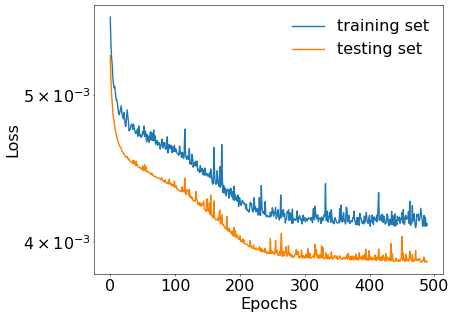

In [41]:
# create a new figure and get the current axis
fig = plt.figure()
ax = fig.gca()

# plot the training and testing losses starting from epoch 10
plt.plot(train_ls[10:], label="training set")
plt.plot(test_ls[10:], label="testing set")

# set x and y labels and show legend
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

# set y-axis scale to log scale
ax.set_yscale("log")


The model seems to be performing well as the loss for both the training and testing sets are decreasing with each epoch.

In [42]:
# predict the labels using the trained model and detach the tensor from the graph
test_predict = model(test_features).detach()

# move tensors to CPU if CUDA is available
if torch.cuda.is_available():
  print("ran on GPU")
  test_labels = test_labels.cpu()
  test_predict = test_predict.cpu()

# calculate mean absolute error for each label
for i in range(test_labels.shape[1]):
  print(y_element[i], np.mean(np.abs(test_labels[:,i].numpy()-test_predict[:,i].numpy())))


oh 0.0142110875
sih 0.019356249
sh 0.038582947
cah 0.019169996
nah 0.084117316
alh 0.03273119
kh 0.050705083
crh 0.040717125
nih 0.018872416
vh 0.06351704
coh 0.035180148


The neural network trained in the previous section performs well in inferring the values of many elemental abundances with high accuracy, achieving a precision of better than 0.02 dex for some elements after only 500 epochs. This result underscores the potential of deep learning models in performing complex tasks with relative ease.

However, it is crucial to recognize that the quality of the input data and the size of the dataset used for training can limit the performance of the model. Therefore, it is essential to consider the quality and quantity of data when building such models.

It is also worth noting that some measurements may have more significant uncertainties than others. In particular, the sodium measurements in our dataset are subject to more significant observational uncertainties, which limits the precision of our inferences. This uncertainty is due to the "ground truth" values themselves being noisy, rather than being an issue with the neural network itself.

Text(0, 0.5, 'Oxygen Inferred')

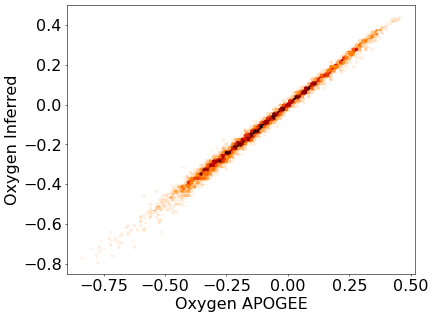

In [43]:
plt.hexbin(test_labels[:,0],test_predict[:,0], cmap="gist_heat_r")
plt.xlabel("Oxygen APOGEE")
plt.ylabel("Oxygen Inferred")

Text(0, 0.5, 'Sodium Inferred')

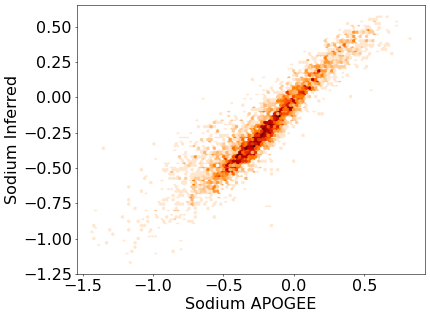

In [44]:
plt.hexbin(test_labels[:,4],test_predict[:,4], cmap="gist_heat_r")
plt.xlabel("Sodium APOGEE")
plt.ylabel("Sodium Inferred")

The ability to infer other elemental abundances with high precision using only Fe and Mg does not mean that we can make exact inferences. We should always remember that there is a difference between inferring and measuring. Additionally, just because we can infer the values of certain abundances with high accuracy does not mean that we understand the causality behind their relationships.

Furthermore, it is important to note that even if the measurement uncertainties are on par or larger than the inference errors, we still cannot equate the two. It is a subtle point that requires careful consideration. Interested readers can refer to [Ting & Weinberg 2022](https://arxiv.org/abs/2102.04992)  for a more detailed discussion of this topic.


---

## Summary

We're wrapping up this lecture on MLP. Let's review what we've learned:

- PyTorch is a powerful framework for optimizing models in arbitrary ways. With only a few lines of code, we can perform multivariate linear regression.

- However, linear regression only captures a limited set of astronomical correlations. To address this, we've learned how to build a basic MLP model from scratch. PyTorch makes it easy to create deep learning models that can capture more complex correlations.

- It's important to use our ability to infer properties of correlations responsibly. Correlation is not causality, and inferences are not measurements.

- We've only scratched the surface of machine learning. For those who want to learn more, we recommend checking out [gluon.ai](http://gluon.ai/) for more exploration of the basics of machine learning.

We hope this lecture has helped you better understand MLP and its applications in astronomy.